Formação Cientista de Dados - Sessão 28  
Previsões com Arima

In [6]:
# Importação das bibliotecas
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
# from pmdarima.arima import auto_arima
from datetime import datetime
# Registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [7]:
# Carregamento da base de dados, conversão do atributo para data e criação da série temporal
base = pd.read_csv('AirPassengers.csv')
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)
ts = base['#Passengers']

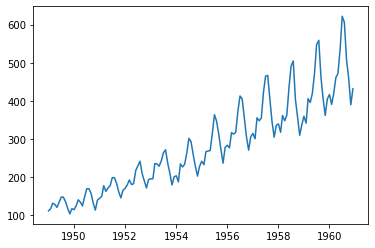

In [8]:
# Visualização da série temporal completa
plt.plot(ts)

In [9]:
# Criação do modelo ARIMA com os parâmetros p = 2, q = 1, d = 2, treinamento e visualização dos resultados
# Mais detalhes sobre o parâmetro freq: https://stackoverflow.com/questions/49547245/valuewarning-no-frequency-information-was-provided-so-inferred-frequency-ms-wi
modelo = ARIMA(ts, order = (2, 1, 2), freq = ts.index.inferred_freq)
modelo_treinado = modelo.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.714
Date:                Sun, 20 Sep 2020   AIC                           1344.043
Time:                        17:43:13   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5307      0.708      3.573      0.000       1.142       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.934      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9098      0.065    -29.509      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9997      0.068     14.805      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2965j            1.0002           -0.0479
MA.2            0.9552           +0.2965j            1.0002            0.0479
-----------------------------------------------------------------------------
"""

In [10]:
# Previsões de 12 datas no futuro
previsoes = modelo_treinado.forecast(steps = 12)[0]
previsoes

array([433.11856157, 450.88757501, 479.81106595, 511.97220726,
       539.32425452, 555.8079135 , 558.75681254, 549.28780803,
       531.66596765, 511.903293  , 496.02727953, 488.50229415])

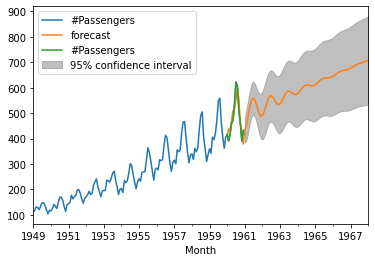

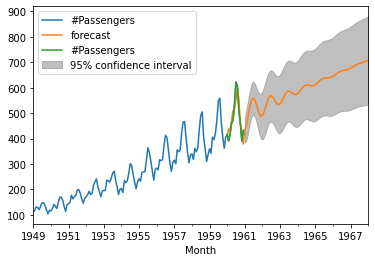

In [11]:
# Criação de eixo para a série temporal completa, com adição das previsões do modelo
# plot_insample = True -> dados originais
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1968-01-01', ax = eixo, plot_insample = True)

In [ ]:
'''
# Implementação do auto arima para descoberta automática dos parâmetros
modelo_auto = auto_arima(ts, m = 12, seasonal = True, trace = False)
modelo_auto.summary()
# Warning abaixo são normais, de acordo com o link abaixo
#ConvergenceWarning: Maximum... https://github.com/statsmodels/statsmodels/issues/6157
'''

In [ ]:
'''
proximos_12 = modelo_auto.predict(n_periods = 12)
# Visualização dos próximos 12 valores
proximos_12 
'''